<h3> <b>Process 4: Data Visualizing</b> </h3>

<hr/>

<h4> <b>Install & Import</b> </h4>

Install & Import the necessary libraries.

In [19]:
# Install libraries

In [20]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<hr/>
<h4> <b>Read data & Create dataframe</b> </h4>

In [21]:
df = pd.read_csv('data/new_data.csv')
df.head()

,jobId,jobTitle,isAnonymous,isSalaryVisible,jobDescription,jobRequirement,jobLevelId,salary,salaryMax,salaryMin,...,workingLocations,address,industries,jobLevel,jobLevelVI,companySize,languageSelected,prettySalary,durationDays,typeWorkingName
0,1680760,Nhân Viên Kinh Doanh MT - GT,False,True,1. Doanh số bán hàng\r\n- Thực hiện bán hàng t...,- Ít nhất 1 năm kinh nghiệm ở vị trí tương đươ...,5,700,700,500,...,{24: 'Hà Nội'},Hà Nội,"{11: 'Customer Service', 32: 'Retail/Wholesale...",Experienced (non-manager),Nhân viên,"(10, 24)",Any,$500 - $700,30,Full-time
1,1680765,Social Media Specialist (Full Time/part-Time),False,False,WE’RE HIRING: SOCIAL MEDIA SPECIALIST (FULL TI...,QUALIFICATIONS\r\n- Fluent in English (IELTS o...,5,0,0,0,...,{24: 'Hà Nội'},"No.298, Vo Chi Cong street, Xuan La Ward, Tay ...","{3: 'Advertising/Promotion/PR', 27: 'Marketing...",Experienced (non-manager),Nhân viên,"(25, 99)",English,Thương lượng,30,Full-time
2,1680758,Kế Toán Tổng Hợp,False,True,- Ghi nhận kiểm tra các nghiệp vụ phát sinh và...,1. Tuổi: Từ 25\r\n2. Bằng cấp: Cao đẳng/Đại Họ...,5,700,700,500,...,{24: 'Hà Nội'},Hà Nội,"{1: 'Accounting', 58: 'Auditing', 59: 'Finance...",Experienced (non-manager),Nhân viên,"(10, 24)",Any,$500 - $700,30,Full-time
3,1680741,Marketing Staff,False,False,"-\tIn charge of trade marketing activities, co...",-\tBachelor degree of Marketing/ Business Admi...,5,0,0,0,...,{24: 'Hà Nội'},"Tầng 6, 51 Phố Lê Đại Hành, Quận Hai Bà Trưng,...","{3: 'Advertising/Promotion/PR', 27: 'Marketing...",Experienced (non-manager),Nhân viên,"(100, 499)",Any,Thương lượng,30,Full-time
4,1680162,Chuyên Viên Chính Quan Hệ Khách Hàng Ưu Tiên -...,False,False,"- Thực hiện hoạt động tìm kiếm, phát triển và ...","- Tốt nghiệp chuyên ngành Tài chính-ngân hàng,...",5,0,0,0,...,{24: 'Hà Nội'},"28C-28D Bà Triệu, Phường Hàng Bài, Hà Nội","{33: 'Sales', 42: 'Banking', 59: 'Finance/Inve...",Experienced (non-manager),Nhân viên,"(100, 499)",Vietnamese,Thương lượng,30,Full-time


<hr/>
<h4> <b>Visualize data</b> </h4>

<h5><b><i>Question 1: </i></b</h5>

I. Which type of working do companies prefer to recruit in jobs?

II. Which the benefits do applicants usually gave by companies?

III. How big are recruiment companies?

IV. Which level the jobs require?

V. How do the range of salary in jobs?

##### *Benefits of answering questions:*

- When we have all the information above, we will easily filter the jobs which we want. 
- Besides, we will have some basic knowledge about the property, trend of VietNam labor market, from that we will have our direction in the future.

##### *I. Which type of working do companies prefer to recruit in jobs?*  

In [22]:
type_working = pd.Series(df['typeWorkingName'].value_counts())
type_working

Full-time      8848
Part-time        46
Internship       29
Freelancer       26
Other            11
Seasonal         10
Online jobs       2
Name: typeWorkingName, dtype: int64

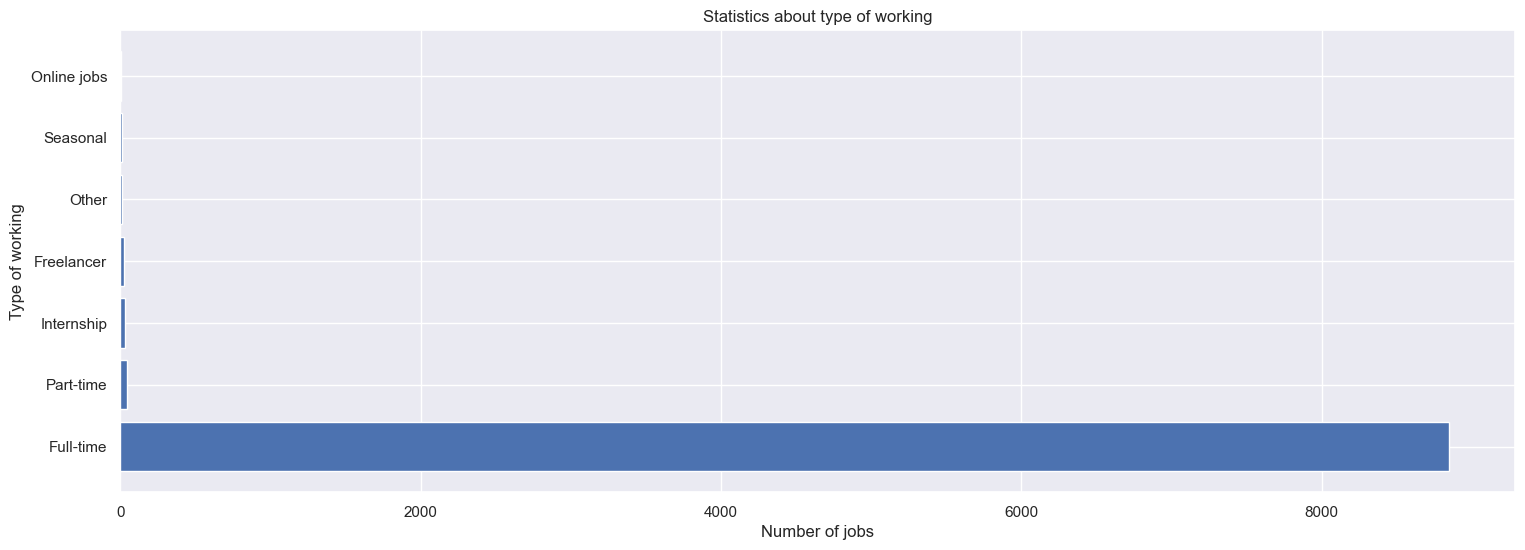

In [23]:
sns.set_theme()
fig,ax = plt.subplots(figsize = (18,6))
plt.barh(type_working.index, type_working.values)
plt.title('Statistics about type of working')
plt.ylabel('Type of working')
plt.xlabel('Number of jobs');
plt.show()

=> I. Which type of working do companies prefer to recruit in jobs?
+ Answer: Most recruimet companies always prefer full-time jobs with more than 8000 jobs (Occupying almost all recruiment jobs)
+ Reason: With type of working is Full-time, the company will manage employee easier than other. Moreover, companies need to find fixed employees.

##### *II. Which the benefits do applicants usually gave by companies?*

In [24]:
df['benefits']

0       {1: 'Bonus', 2: 'Healthcare Plan', 10: 'Team A...
1       {1: 'Bonus', 2: 'Healthcare Plan', 4: 'Training'}
2       {1: 'Bonus', 2: 'Healthcare Plan', 10: 'Team A...
3       {1: 'Bonus', 2: 'Healthcare Plan', 9: 'Travel ...
4                {1: 'Bonus', 4: 'Training', 5: 'Awards'}
                              ...                        
8967              {1: 'Bonus', 5: 'Awards', 15: 'Others'}
8968              {1: 'Bonus', 5: 'Awards', 15: 'Others'}
8969    {2: 'Healthcare Plan', 3: 'Paid Leave', 10: 'T...
8970              {1: 'Bonus', 5: 'Awards', 15: 'Others'}
8971              {1: 'Bonus', 5: 'Awards', 15: 'Others'}
Name: benefits, Length: 8972, dtype: object

In [25]:
df['benefits'] = df['benefits'].apply(eval)
benefits_data =[]
for i in df['benefits']:
    for j in i.values():
        benefits_data.append(j)

In [26]:
benefits = pd.Series(benefits_data)
benefits = pd.Series(benefits.value_counts())
benefits

Bonus                   7601
Healthcare Plan         5564
Training                2542
Paid Leave              2162
Others                  2051
Travel Opportunities    1534
Team Activities         1044
Awards                   810
Transportation           792
Laptop                   614
Canteen                  375
Vouchers                 194
Mobile                    91
Library                   56
Kindergarten              29
dtype: int64

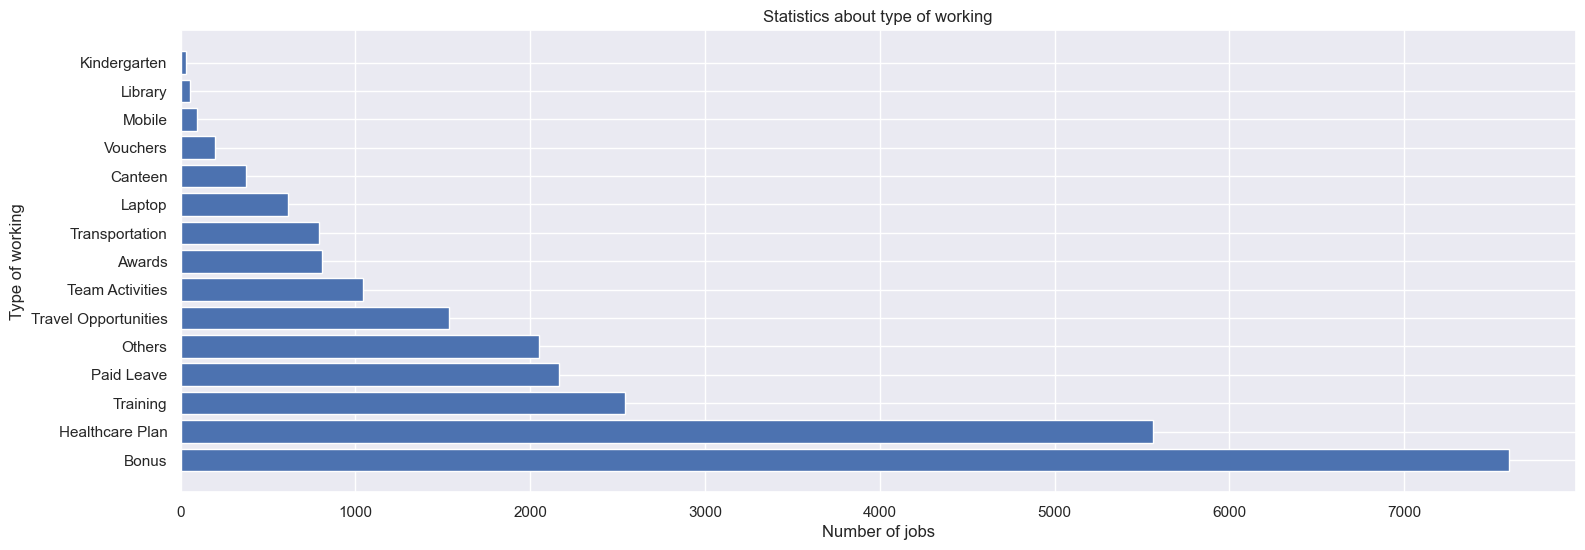

In [27]:
sns.set_theme()
fig,ax = plt.subplots(figsize = (18,6))
plt.barh(benefits.index, benefits.values)
plt.title('Statistics about type of working')
plt.ylabel('Type of working')
plt.xlabel('Number of jobs');
plt.show()

=> II. Which the benefits do applicants usually gave by companies?
+ Answer: Most recruitment jobs usually provide "Bonus" for applicants. Besides, "Training" and "Healthcare Plan" are also provided to applicants quite a lot. 
+ Reason: This is all basic benefits which companies can easily give to applicants.

##### *III. How big are recruiment companies?*

In [28]:
company_size = pd.Series(df['companySize'].value_counts())
company_size

(100, 499)        3805
(25, 99)          1793
(1000, 4999)      1207
(500, 999)         763
(10, 24)           667
(5000, 9999)       329
(10000, 19999)     215
(0, 10)            108
(20000, 49999)      43
(50000, 99999)      42
Name: companySize, dtype: int64

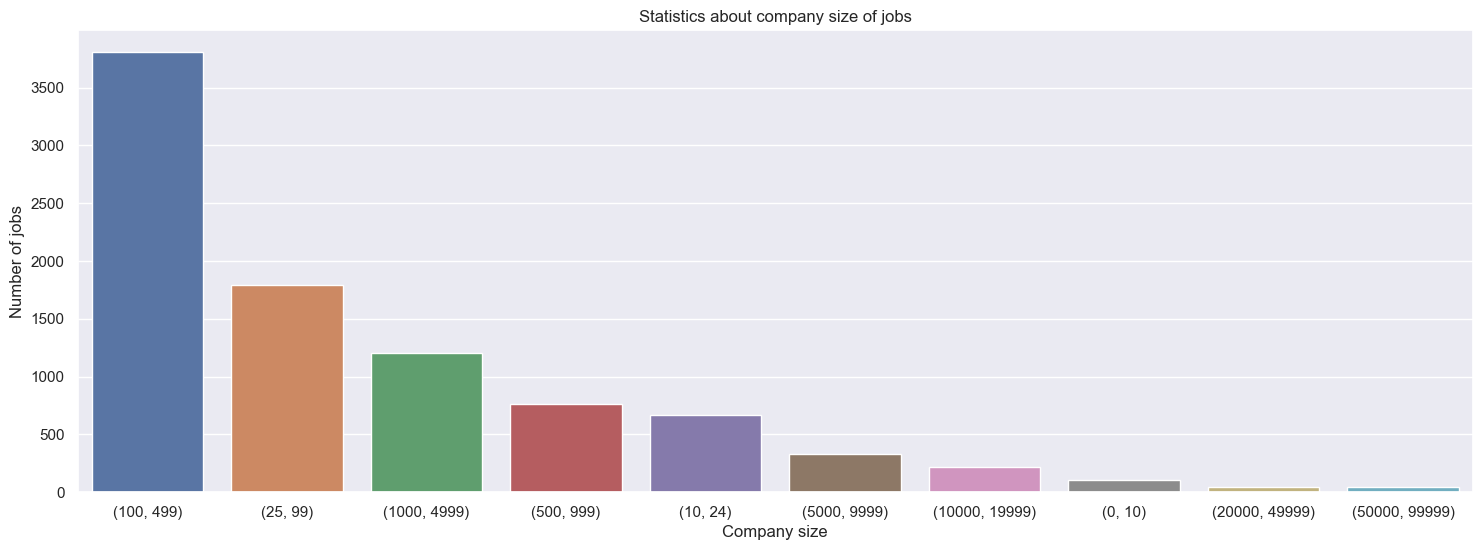

In [29]:
sns.set_theme()
fig,ax = plt.subplots(figsize = (18,6))
sns.countplot(data = df, x = 'companySize', order = df['companySize'].value_counts().index);
plt.title('Statistics about company size of jobs')
plt.xlabel('Company size')
plt.ylabel('Number of jobs');

=> III. How big are recruiment companies?
+ Answer: The company size of almost recruiment company is **100-499** and only some companies have the size **50000-99999** and **20000-49999** 
+ Reason: It exactly reflected the actual status of VietNam's labor market because the companies in VietNam primarily have small and medium size. It only has some big size companies

##### *IV. Which level the jobs require?*  

In [30]:
job_level = pd.Series(df['jobLevel'].value_counts())
job_level

Experienced (non-manager)    5956
Manager                      1461
Fresher/Entry level          1154
Director and above            236
Intern/Student                165
Name: jobLevel, dtype: int64

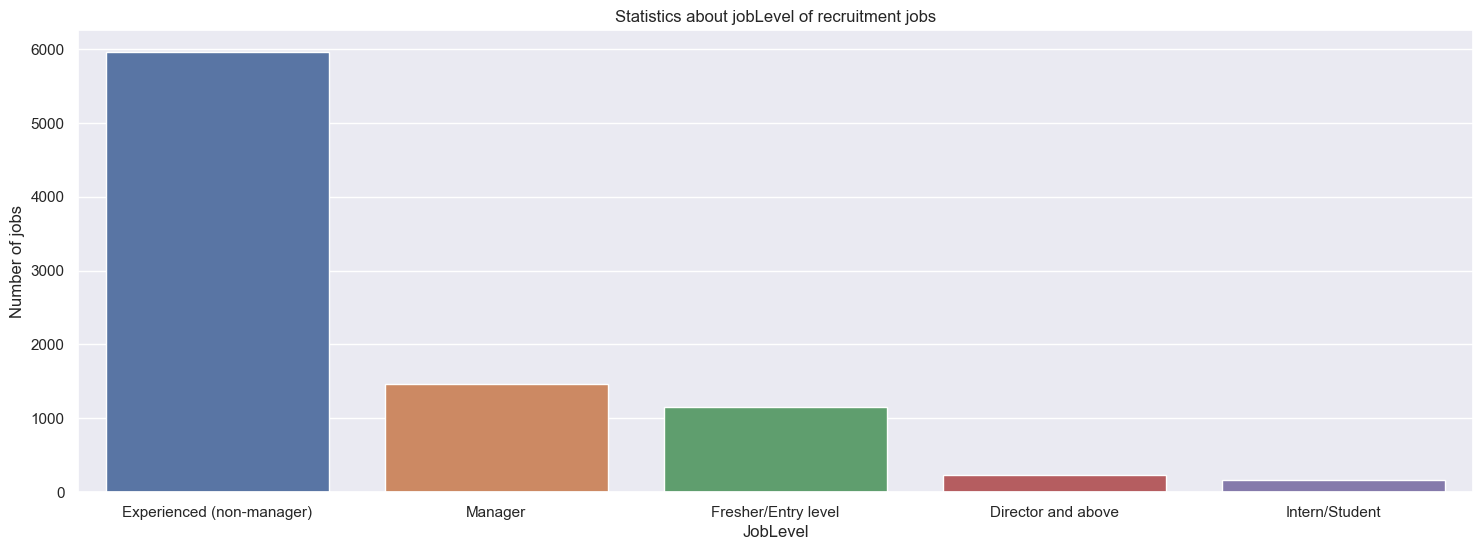

In [31]:
sns.set_theme()
fig,ax = plt.subplots(figsize = (18,6))
sns.countplot(data = df, x = 'jobLevel', order = job_level.index);
plt.title('Statistics about jobLevel of recruitment jobs')
plt.ylabel('Number of jobs')
plt.xlabel('JobLevel');

=> IV. Which level the jobs require?
+ Answer: Most companies recruit the employees who are **Experienced (non-manager)** and few companies recruit the employees who are **Intern/Student**
+ Reason: Most companies recruit experienced employees because they want to check worker's abilities.In the opposite, number of jobs need to recruit Intern/Student is very small because it is group people who not have experiences and they need to be trained to have ability to work for company.

##### *V. How do the range of salary in jobs?*  

In [34]:
bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,20000,150000000]
labels = ['(0,500]','(500,1000]','(1000,1500]','(1500,2000]','(2000,2500]','(2500,3000]','(3000,3500]','(3500,4000]','(4000,4500]',
'(4500,5000]','(5000,5500]','(5500,6000]','(6000,6500]','(6500,7000]','(7000,7500]','(7500,8000]','(8000,8500]',
'(8500,9000]','(9000,9500]','(9500,10000]','(10000,20000]','(20000,100000]']
df_count = pd.cut(df['salary'],bins = bins,labels = labels).value_counts(sort = False)
df_count

(0,500]            405
(500,1000]        1520
(1000,1500]        723
(1500,2000]        306
(2000,2500]        118
(2500,3000]        106
(3000,3500]         34
(3500,4000]         25
(4000,4500]          7
(4500,5000]         32
(5000,5500]          0
(5500,6000]          7
(6000,6500]          1
(6500,7000]          1
(7000,7500]          1
(7500,8000]          0
(8000,8500]          0
(8500,9000]          0
(9000,9500]          1
(9500,10000]         4
(10000,20000]        7
(20000,100000]       3
Name: salary, dtype: int64

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9424\2541024319.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  df_count.plot.bar(y ='salary',use_index = True).figure.show();


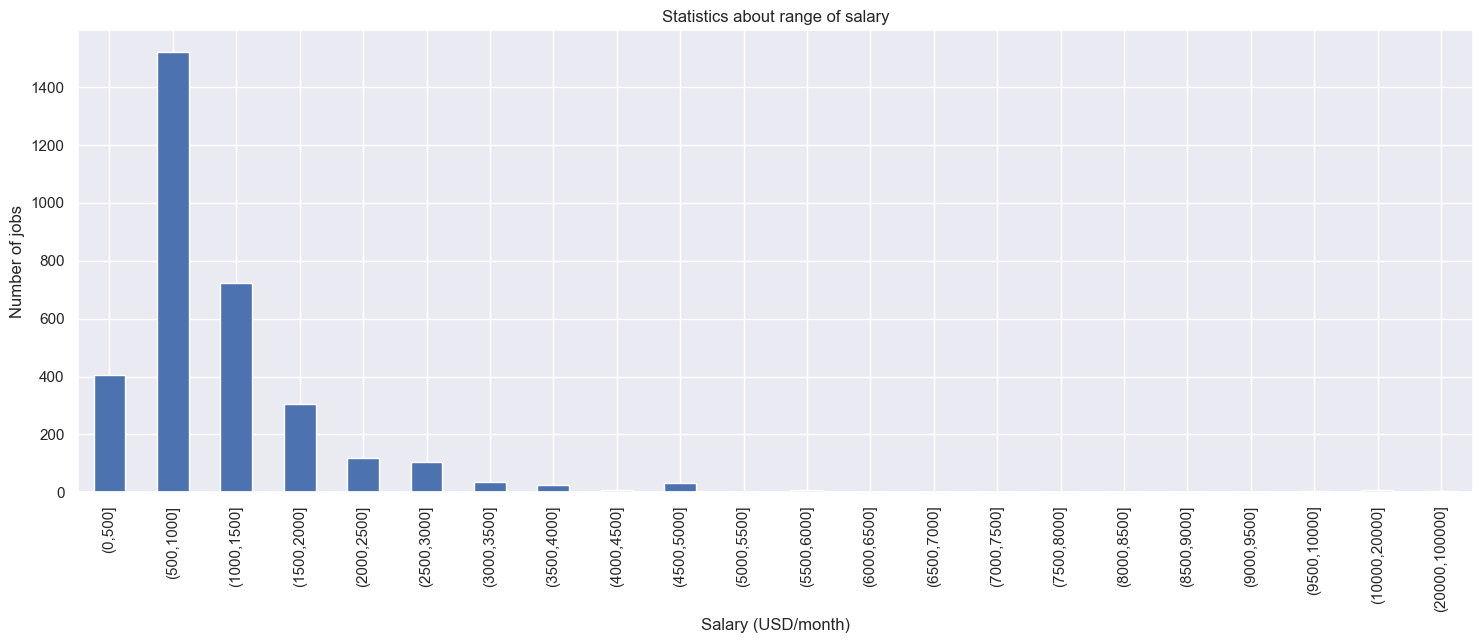

In [35]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (18,6))
df_count.plot.bar(y ='salary',use_index = True).figure.show();
plt.title('Statistics about range of salary');
plt.xlabel('Salary (USD/month)')
plt.ylabel('Number of jobs');

=> V. How do the range of salary in jobs?
+ Answer: Most the range of salary is within 500 - 1000 USD primarily . 
+ Reason: Most the companies recruit **Experienced (non-manager)** so this range of salary (500 - 1000 USD) reflected the salary which this workers will receive.

<h5><b><i>Question 2: </i></b> Find out about some interesting <b>Top 20</b> </h5>